<b>Тема проекта:</b> Проверка гипотез по увеличению выручки интернет-магазина и анализ результатов А/В-теста.

<b>Задачи проекта:</b>     
1.приоритизировать гипотезы,   
2. проанализировать результаты A/B-теста:  
- построить графики: кумулятивной выручки по группам, кумулятивного среднего чека, кумулятивного среднего количества заказов и их относительного изменения, 
- проанализировать данные на аномальные значения, выбрать границы аномальных значений по количеству заказов и стоимости заказов, 
- посчитать статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по "сырым" и "очищенным" данным,
- сделать выводы и принять решение: приостановить тест на основании достаточности данных или продолжить его. 


<b>Описание данных:</b>  Описание данных:  
Есть данные крупного интернет-магазина.  
Данные хранятся в 3 файлах: 
- Отделом маркетинга подготовлен список гипотез для увеличения выручки. Файл hipothesis содержит гипотезы и их оценки по параметрам Reach, Impact, Confidence, Effort,  
- файл orders содержит данные о заказах пользователей, id пользователя и заказа, дате заказа, сумме заказа и группе, к которой относится пользователь,  
- файл visitors содержит данные о количестве пользователей по датам и группам.  

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Приоритизация гипотез

Выгрузим файл с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 

In [3]:
hipothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hipothesis['ICE'] = hipothesis['Impact']*hipothesis['Confidence']/hipothesis['Efforts']

In [5]:
pd.set_option('max_colwidth', 200)
round(hipothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False),2)


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Самыми приоритетными у нас оказались гипотезы 8, 0, 7 и 6.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
hipothesis['RICE'] = hipothesis['Reach']*hipothesis['Impact']*hipothesis['Confidence']/hipothesis['Efforts']

In [7]:
hipothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При методе RICE приоритеты немного изменились, самыми приоритетными оказались гипотезы 7,2,0 и 6.
Т.к. в этом методе добавляется параметр охвата количества пользователей, то на первое место вышли гипотезы, которые затронут большее количество пользователей, которые в дальнейшем смогут принести дополнительную выручку.

# Анализ A/B-теста

Был проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Проанализируем их результаты.

In [9]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders['date'] = pd.to_datetime(orders['date'])

In [12]:
orders.duplicated().sum()

0

In [13]:
A = orders.query("group == 'A'")['visitorId']

In [14]:
visitorIdAB = orders.query("group == 'B' and visitorId in @A")['visitorId']

In [15]:
visitorIdAB.count()

92

Явных дубликатов в данных даблицы нет, но зато обнаружилось 92 пользователя, которые присутствуют одновременно в группе А и группе В. Лучше данных пользователей исключить из анализа для получения более точного результата.

In [16]:
orders = orders.query('visitorId not in @visitorIdAB')

In [18]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [21]:
visitors.duplicated().sum()

0

## Построим график кумулятивной выручки по группам. 

Создадим массив уникальных пар значений дат и групп. 

In [22]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [23]:
datesGroups['date'].nunique()

31

Соберём агрегированные кумулятивные  данные по дням о заказах и посетителях и объединим их в одну таблицу. 

In [24]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 


In [25]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 


In [26]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [27]:
cumulativeData.head(5) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням. 

In [28]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders','visitors']]

In [29]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders','visitors']]

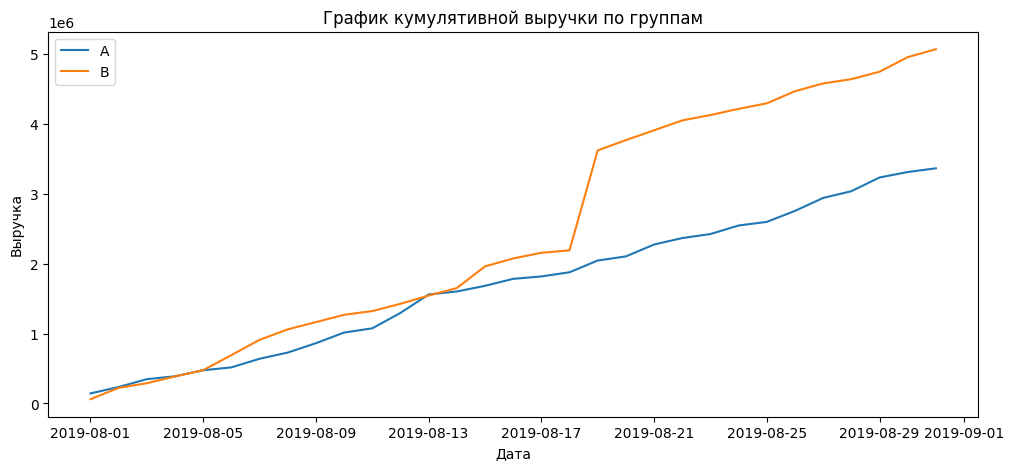

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка');

Выручка по группе А достаточно равномерно растет. По группе В показатели выручки выше и примерно с середины тестирования отмечается резкий скачок выручки. Это может быть связано либо с резким увеличением количества заказов или появлением крупных покупок в данной группе в этот период.

## Построим график кумулятивного среднего чека по группам. 

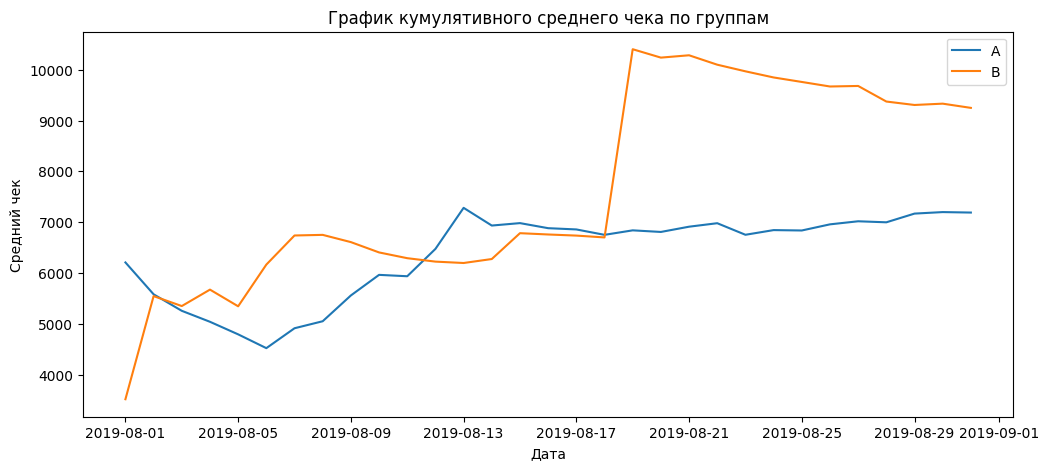

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек');

Средний чек по группе А стал более-менее равномерным ближе к середине теста. А у группы В он резко вырос в середине и начал понемногу снижаться. Можно предположить, что в данный период времени был сделан один или несколько крупных заказов.

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

In [32]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

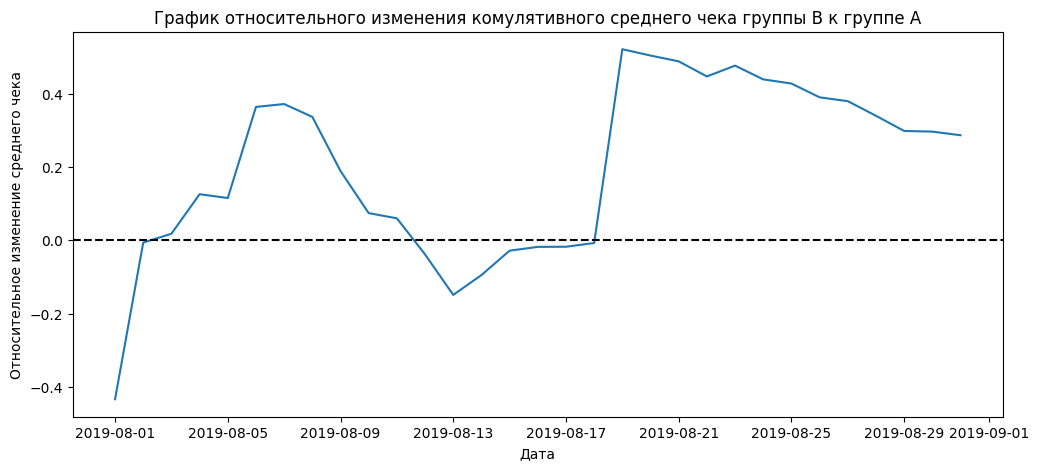

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения комулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека');

График различия между сегментами сильно меняется. Возможно в данных присутствуют выбросы.

## Построим график кумулятивного среднего количества заказов на посетителя(график конверсии) по группам. 

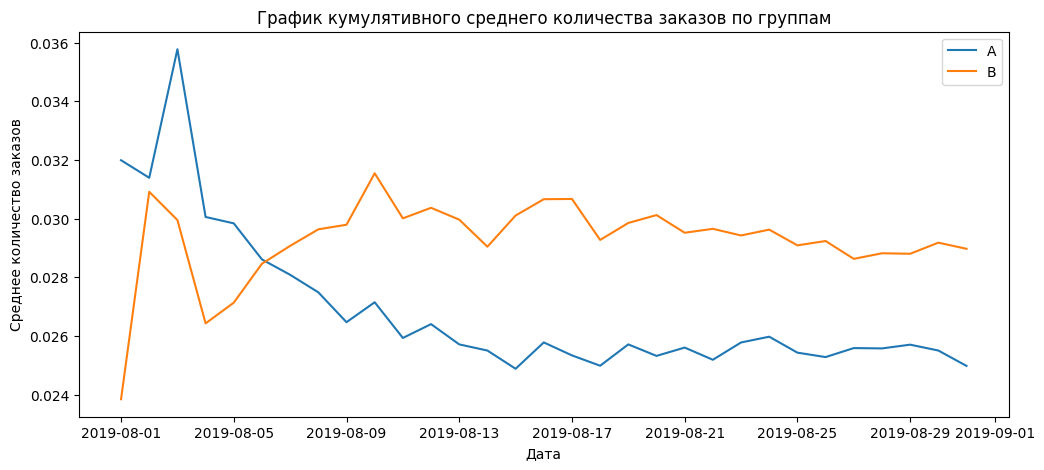

In [34]:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов');

График куммулятивного среднего количества заказов на посетителя более-менее стабилизировался через несколько дней по обеим группам, причем по группе В этот показатель стабильно выше группы А. 

## Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

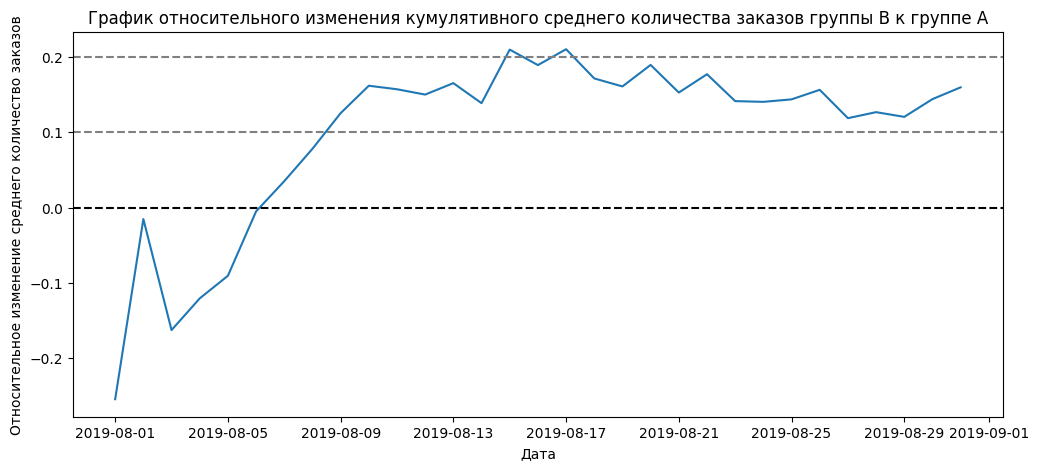

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])
         /(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего количество заказов');

По графику видно, что через несколько дней среднее количество заказов на одного посетителя группы В стало стабильно превышать этот показатель группы А на 10-20%

## Построим точечный график количества заказов по пользователям.

In [36]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})


In [37]:
ordersByUsers.columns = ['userId', 'orders']

In [38]:
x_values = pd.Series(range(0,len(ordersByUsers)))

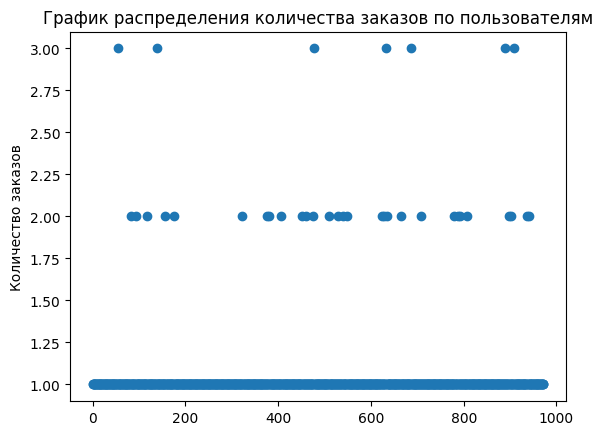

In [39]:
plt.scatter(x_values,ordersByUsers['orders'])
plt.title('График распределения количества заказов по пользователям')
plt.ylabel('Количество заказов');

Для наглядности также продублируем его гистограммой.

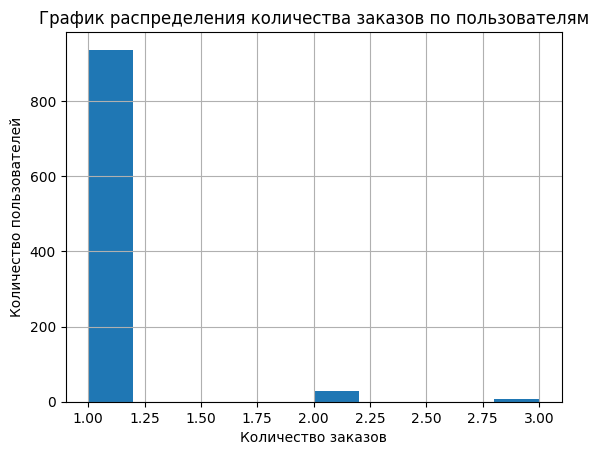

In [40]:
ordersByUsers['orders'].hist()
plt.title('График распределения количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей');

По графику видно, что большинство пользователей совершают 1 заказ, во много раз меньше  2  и 3 заказа.  
Определим долю людей, совершающих разное количество заказов.

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [41]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Получается, что только 5% пользователей совершали более 1 заказа и всего 1% - более 2 раз. Определим 2 заказа как верхнюю границу числа заказов. Выше этого количество заказов будем считать аномальными значениями.

## Построим точечный график стоимостей заказов. 

In [42]:
x_values = pd.Series(range(0, len(orders['revenue'])))

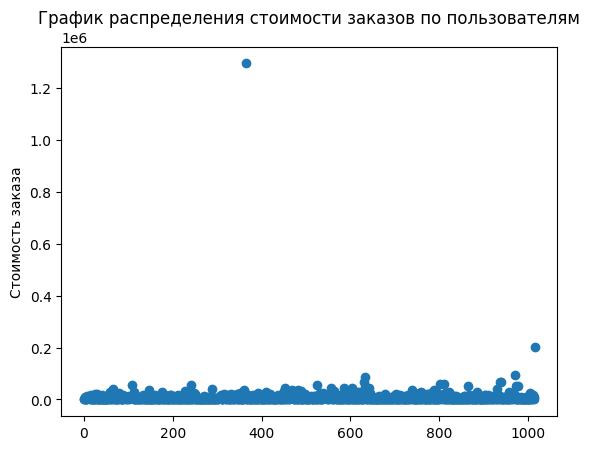

In [43]:
plt.scatter(x_values,orders['revenue'])
plt.title('График распределения стоимости заказов по пользователям')
plt.ylabel('Стоимость заказа');

Обнаружилось 2 крупных заказа на 1,2 и 0,2млн.

Ограничим график по оси у стоимостью заказа в 100 000, чтобы посмотреть распределение стоимостей без аномальных значений. 

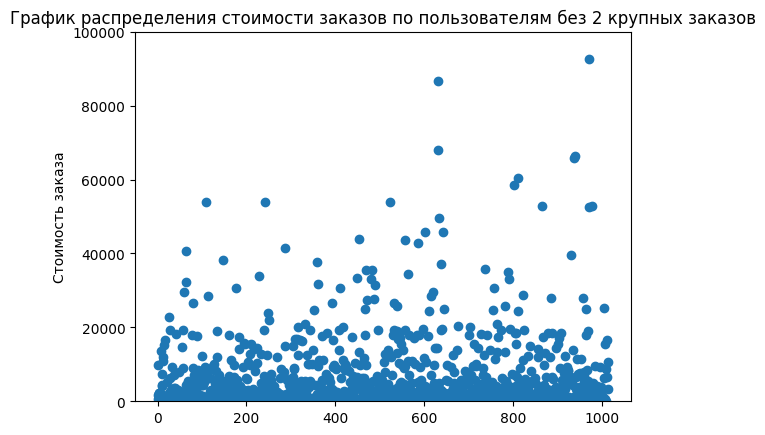

In [44]:
plt.scatter(x_values,orders['revenue'])
plt.ylim(0,100000)
plt.title('График распределения стоимости заказов по пользователям без 2 крупных заказов')
plt.ylabel('Стоимость заказа');


По данному графику видно, что большинство заказов по сумме не превышают 20 000 или чуть больше.

## Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [45]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Получается, что только 5% пользователей совершали заказы на сумму выше 26 785 и 1% - свыше 53 904 рублей. 
Примем за верхнюю границу стоимость заказа 26 785 рублей, свыше этой суммы будем считать заказы аномальными.

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
Сформулируем гипотезы.  
Нулевая: статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет.  
Альтернативная: статистически значимые различия в среднем между группами по "сырым" данным есть.

Примем за критический уровень статистической значимости alpha=0.05. Для анализа результатов A/B-тестирования применим непараметрический метод 
st.mannwhitneyu(), т.к. в данных есть большие выбросы. 

In [46]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)\
.agg({'transactionId': pd.Series.nunique})


In [47]:
ordersByUsersA.columns = ['userId', 'orders']

In [48]:
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)\
.agg({'transactionId': pd.Series.nunique})

In [49]:
ordersByUsersB.columns = ['userId', 'orders']

In [50]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

In [51]:
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [52]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

In [53]:
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Создадим таблицу, которая включает в т.ч. пользователей, которые не сделали ни одного заказа. 

In [54]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [55]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [56]:
print('p-value =  '"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value =  0.011


p-value меньше уровня статистической значимости, значит нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет, отвергаем.

In [57]:
print('Относительный прирост среднего числа заказов группы В: '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост среднего числа заказов группы В: 0.160


Относительный прирост группы B равен 16.0% 

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
Нулевая гипотеза: статистически значимых различий в среднем чеке между группами по "сырым" данным нет.  
Альтернативная гипотеза: статистически значимые различия в среднем чеке между группами по "сырым" данным есть.

In [58]:
print('p-value =  '"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                 orders[orders['group']=='B']['revenue'])[1],))

p-value =  0.829


In [59]:
print('Относительный прирост суммы среднего чека заказов группы В:  '"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/
                                                                                orders[orders['group']=='A']['revenue'].mean()-1))

Относительный прирост суммы среднего чека заказов группы В:  0.287


P-value значительно больше 0.05. Отвергать нулевую гипотезу о равенстве средних чеков в группах нет оснований, даже если средний чек группы B выше среднего чека группы A на 28,7%.

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Сформируем общий список id пользователей с аномально большими суммами заказов(более 26785р.) и аномально большим количеством заказов (более 2 заказов). Далее создадим переменные sampleAFiltered и sampleBFiltered, в которых сохранены очищенные данные о заказах — не включая аномальных пользователей.

Примем за критический уровень статистической значимости alpha=0.05. Для анализа результатов A/B-тестирования применим непараметрический метод st.mannwhitneyu().

Сформулируем гипотезы.  
Нулевая: статистически значимых различий в среднем количестве заказов между группами по "очищенным" данным нет.  
Альтернативная: статистически значимые различия в среднем между группами по "очищенным" данным есть.

In [60]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],],axis=0,)

In [61]:
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

In [62]:
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
.drop_duplicates().sort_values())

In [63]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
pd.Series(0,index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)


In [64]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
pd.Series(0,index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

In [65]:
print("P-value: "'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

P-value: 0.012


In [66]:
print('Относительный прирост среднего числа заказов группы В:'"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Относительный прирост среднего числа заказов группы В:0.182


P-value меньше 0.05. Как и в расчете по "сырым" данным можно отвергнуть нулевую гипотезу, что статистически значимых различий в среднем числе заказов между группами нет. 
Относительный прирост группы B равен 18.2% против 16,0% при расчете по "сырым данным", т.е. на 2,2% больше.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем гипотезы.

Нулевая: статистически значимых различий в среднем чеке заказов между группами по "очищенным" данным нет. Альтернативная: статистически значимые различия в среднем чеке между группами по "очищенным" данным есть.

Примем за критический уровень статистической значимости alpha=0.05.

Для анализа результатов A/B-тестирования применим непараметрический метод st.mannwhitneyu().

In [67]:
print('P-value: '"{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
                                        orders[np.logical_and(orders['group'] == 'B',
np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))


P-value: 0.646


In [68]:
print('Относительный прирост суммы среднего чека заказов группы В:  '"{0:.3f}".format(orders
                 [np.logical_and(orders['group'] == 'B',
                                 np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/
                 orders[np.logical_and(orders['group'] == 'A',
                                       np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1))



Относительный прирост суммы среднего чека заказов группы В:  -0.048


P-value значительно больше 0.05. Отвергать нулевую гипотезу о равенстве средних чеков в группах нет оснований. Кроме того, средний чек группы B по «очищенным» данным оказался ниже среднего чека группы A на 4,8% в отличии от расчета по "сырым" данным (в них он был выше на 28,7%). Можно сделать вывод, что на резкое увеличение среднего чека в группе В повлияли выбросы - заказы с аномально большими суммами и сильно исказили результаты.

## Принятие решения по результатам теста. 

Проанализировав результаты теста можно принять решение остановить тест, зафиксировать победу групп В. Результаты теста показали, что количество заказов на одного пользователя по группе В выросло на 18.2% по очищенным данным (и на 16,0% по «сырым данным»). 
Гипотеза о расхождении суммы среднего чего по группам не подтвердилась. Хотя относительное расхождение есть, оно составляет 4.8%. Данное расхождение незначительное и не повлияет на увеличение выручки по группе В, т.к. перекрывается увеличением количества заказов на одного пользователя на 18.2/16,0%. 